In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
IMG_HEIGHT = 100
IMG_WIDTH = 100
INPUT_SHAPE = [IMG_HEIGHT,IMG_WIDTH,3]

BATCH_SIZE = 32

EPOCHS = 20

In [41]:
training_dataset = '/content/drive/MyDrive/FireNet/Dataset/Training'
testing_dataset = '/content/drive/MyDrive/FireNet/Dataset/Testing'

training_data_gen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    brightness_range=(0.2,0.8),
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    channel_shift_range=0.0,
                                    fill_mode='nearest',
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    rescale=1./255)

testing_data_gen = ImageDataGenerator(rotation_range=40,
                                    brightness_range=(0.2,0.8),
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    rescale=1./255)

training = training_data_gen.flow_from_directory(training_dataset,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='binary')

validation = testing_data_gen.flow_from_directory(testing_dataset,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               batch_size=BATCH_SIZE,
                                               class_mode='binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [44]:
# Importing the necessary components/layers for the convolutional neural network
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import SGD

from tensorflow.keras.metrics import AUC

In [45]:
# Creating a model history logger to save results
filename='FireNetResults.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=',', append=True)

In [46]:
# Initializing, customizing, and compiling CNN model

cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=7, activation='relu', input_shape=INPUT_SHAPE))
cnn.add(MaxPool2D(pool_size=2, strides=1))
cnn.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=INPUT_SHAPE))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dense(units=16, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(units=16, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(units=1, activation='sigmoid'))

opt = SGD(learning_rate=0.0001, momentum=0.9)
cnn.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy', AUC()])

In [54]:
EPOCHS = 10

# Training and validating CNN using training and validation data
history = cnn.fit(x=training, validation_data=validation, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[history_logger])

Epoch 1/10
58/58 [==============================] - 60s 1s/step - loss: 0.2654 - accuracy: 0.9088 - auc_10: 0.9583 - val_loss: 0.2805 - val_accuracy: 0.9118 - val_auc_10: 0.9412
Epoch 2/10
58/58 [==============================] - 60s 1s/step - loss: 0.2622 - accuracy: 0.9154 - auc_10: 0.9602 - val_loss: 0.3652 - val_accuracy: 0.8824 - val_auc_10: 0.9219
Epoch 3/10
58/58 [==============================] - 60s 1s/step - loss: 0.2581 - accuracy: 0.9148 - auc_10: 0.9606 - val_loss: 0.2972 - val_accuracy: 0.8824 - val_auc_10: 0.9412
Epoch 4/10
58/58 [==============================] - 59s 1s/step - loss: 0.2613 - accuracy: 0.9154 - auc_10: 0.9614 - val_loss: 0.2687 - val_accuracy: 0.8971 - val_auc_10: 0.9422
Epoch 5/10
58/58 [==============================] - 60s 1s/step - loss: 0.2598 - accuracy: 0.9132 - auc_10: 0.9600 - val_loss: 0.4026 - val_accuracy: 0.8529 - val_auc_10: 0.9249
Epoch 6/10
58/58 [==============================] - 60s 1s/step - loss: 0.2690 - accuracy: 0.9045 - auc_10: 0.

In [50]:
import matplotlib.pyplot as plt

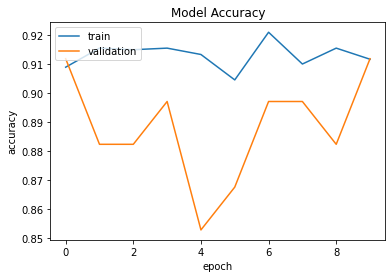

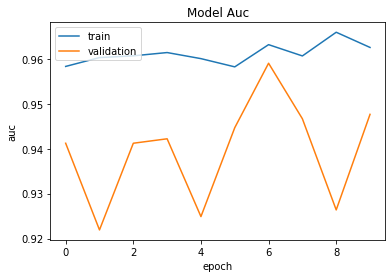

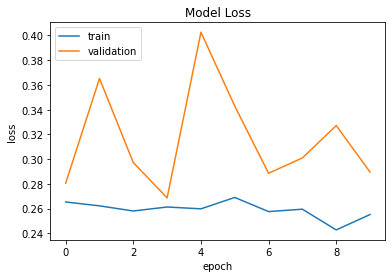

In [56]:
# To plot a graph representing the accuracy of the model per epoch 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# To plot a graph representing the AUC score of the model per epoch 
plt.plot(history.history['auc_10'])
plt.plot(history.history['val_auc_10'])
plt.title('Model Auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# To plot a graph representing the AUC score of the model per epoch 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [57]:
cnn.save('FireNet.h5')
print('Model Saved!')

Model Saved!
